In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from datetime import datetime
warnings.filterwarnings("ignore")
pd.set_option("display.max_columns",100)
from sklearn.model_selection import train_test_split

In [4]:
df=pd.read_csv("profiles.csv")

In [5]:
df.head()

,age,body_type,diet,drinks,drugs,education,essay0,essay1,essay2,essay3,essay4,essay5,essay6,essay7,essay8,essay9,ethnicity,height,income,job,last_online,location,offspring,orientation,pets,religion,sex,sign,smokes,speaks,status
0,22.0,a little extra,strictly anything,socially,never,working on college/university,about me:<br />\n<br />\ni would love to think...,currently working as an international agent fo...,making people laugh.<br />\nranting about a go...,"the way i look. i am a six foot half asian, ha...","books:<br />\nabsurdistan, the republic, of mi...",food.<br />\nwater.<br />\ncell phone.<br />\n...,duality and humorous things,trying to find someone to hang out with. i am ...,i am new to california and looking for someone...,you want to be swept off your feet!<br />\nyou...,"asian, white",75.0,-1.0,transportation,2012-06-28-20-30,"south san francisco, california","doesn&rsquo;t have kids, but might want them",straight,likes dogs and likes cats,agnosticism and very serious about it,m,gemini,sometimes,english,single
1,35.0,average,mostly other,often,sometimes,working on space camp,i am a chef: this is what that means.<br />\n1...,dedicating everyday to being an unbelievable b...,being silly. having ridiculous amonts of fun w...,NaN,i am die hard christopher moore fan. i don't r...,delicious porkness in all of its glories.<br /...,NaN,NaN,i am very open and will share just about anyth...,NaN,white,70.0,80000.0,hospitality / travel,2012-06-29-21-41,"oakland, california","doesn&rsquo;t have kids, but might want them",straight,likes dogs and likes cats,agnosticism but not too serious about it,m,cancer,no,"english (fluently), spanish (poorly), french (...",single
2,38.0,thin,anything,socially,NaN,graduated from masters program,"i'm not ashamed of much, but writing public te...","i make nerdy software for musicians, artists, ...",improvising in different contexts. alternating...,my large jaw and large glasses are the physica...,okay this is where the cultural matrix gets so...,movement<br />\nconversation<br />\ncreation<b...,NaN,viewing. listening. dancing. talking. drinking...,"when i was five years old, i was known as ""the...","you are bright, open, intense, silly, ironic, ...",NaN,68.0,-1.0,NaN,2012-06-27-09-10,"san francisco, california",NaN,straight,has cats,NaN,m,pisces but it doesn&rsquo;t matter,no,"english, french, c++",available
3,23.0,thin,vegetarian,socially,NaN,working on college/university,i work in a library and go to school. . .,reading things written by old dead people,playing synthesizers and organizing books acco...,socially awkward but i do my best,"bataille, celine, beckett. . .<br />\nlynch, j...",NaN,cats and german philosophy,NaN,NaN,you feel so inclined.,white,71.0,20000.0,student,2012-06-28-14-22,"berkeley, california",doesn&rsquo;t want kids,straight,likes cats,NaN,m,pisces,no,"english, german (poorly)",single
4,29.0,athletic,NaN,socially,never,graduated from college/university,hey how's it going? currently vague on the pro...,work work work work + play,creating imagery to look at:<br />\nhttp://bag...,i smile a lot and my inquisitive nature,"music: bands, rappers, musicians<br />\nat the...",NaN,NaN,NaN,NaN,NaN,"asian, black, other",66.0,-1.0,artistic / musical / writer,2012-06-27-21-26,"san francisco, california",NaN,straight,likes dogs and likes cats,NaN,m,aquarius,no,english,single


In [6]:
df.tail()

,age,body_type,diet,drinks,drugs,education,essay0,essay1,essay2,essay3,essay4,essay5,essay6,essay7,essay8,essay9,ethnicity,height,income,job,last_online,location,offspring,orientation,pets,religion,sex,sign,smokes,speaks,status
60547,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
60548,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
60549,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
60550,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
60551,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
df.shape

(60552, 31)

In [8]:
df.isnull().sum()

age            51038
body_type      51886
diet           54791
drinks         51540
drugs          53337
education      52093
essay0         51885
essay1         52205
essay2         52503
essay3         52862
essay4         52673
essay5         52738
essay6         53200
essay7         52999
essay8         54191
essay9         52998
ethnicity      51987
height         51038
income         51038
job            52369
last_online    51038
location       51038
offspring      56666
orientation    51038
pets           54200
religion       54291
sex            51038
sign           52776
smokes         51956
speaks         51044
status         51038
dtype: int64

In [10]:
df=df.drop_duplicates()[:9514]

In [11]:
df.tail(3)

,age,body_type,diet,drinks,drugs,education,essay0,essay1,essay2,essay3,essay4,essay5,essay6,essay7,essay8,essay9,ethnicity,height,income,job,last_online,location,offspring,orientation,pets,religion,sex,sign,smokes,speaks,status
9511,34.0,average,NaN,socially,NaN,dropped out of college/university,"33 year old, hiv +,versatile gwm, bearish type...",i've just recently moved to beautiful san fran...,"buying ""crap"" at random places and then sellin...",i usually go unnoticed.......,my favorite books - i don't read as much as i ...,-my record player<br />\n-my internet connecti...,nothing and everything all at once,probably working. then having drinks in the ca...,"i smoke marijuana, but nothing harder.","you're interested, duh!?!?",white,71.0,-1.0,hospitality / travel,2012-04-28-12-42,"san francisco, california",doesn&rsquo;t want kids,gay,likes dogs and has cats,atheism and laughing about it,m,leo and it&rsquo;s fun to think about,when drinking,english (fluently),single
9512,29.0,athletic,anything,rarely,never,two-year college,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,white,70.0,-1.0,NaN,2012-03-01-15-17,"san francisco, california","doesn&rsquo;t have kids, and doesn&rsquo;t wan...",gay,likes dogs and has cats,NaN,m,aries,no,"english (fluently), french (okay), swedish (po...",single
9513,49.0,overweight,NaN,rarely,never,graduated from college/university,NaN,NaN,NaN,NaN,"books: biographies, history, harry potter, mys...","the internet, art supplies, family, garden, my...",NaN,NaN,NaN,NaN,white,64.0,-1.0,rather not say,2012-06-14-15-14,"castro valley, california",NaN,straight,likes dogs and likes cats,NaN,f,pisces and it&rsquo;s fun to think about,no,english,single


In [15]:
for i in df:
    #print(i)
    if("essay" in i):
        df.drop(i,axis=1,inplace=True)

In [16]:
df.head()

,age,body_type,diet,drinks,drugs,education,ethnicity,height,income,job,last_online,location,offspring,orientation,pets,religion,sex,sign,smokes,speaks,status
0,22.0,a little extra,strictly anything,socially,never,working on college/university,"asian, white",75.0,-1.0,transportation,2012-06-28-20-30,"south san francisco, california","doesn&rsquo;t have kids, but might want them",straight,likes dogs and likes cats,agnosticism and very serious about it,m,gemini,sometimes,english,single
1,35.0,average,mostly other,often,sometimes,working on space camp,white,70.0,80000.0,hospitality / travel,2012-06-29-21-41,"oakland, california","doesn&rsquo;t have kids, but might want them",straight,likes dogs and likes cats,agnosticism but not too serious about it,m,cancer,no,"english (fluently), spanish (poorly), french (...",single
2,38.0,thin,anything,socially,NaN,graduated from masters program,NaN,68.0,-1.0,NaN,2012-06-27-09-10,"san francisco, california",NaN,straight,has cats,NaN,m,pisces but it doesn&rsquo;t matter,no,"english, french, c++",available
3,23.0,thin,vegetarian,socially,NaN,working on college/university,white,71.0,20000.0,student,2012-06-28-14-22,"berkeley, california",doesn&rsquo;t want kids,straight,likes cats,NaN,m,pisces,no,"english, german (poorly)",single
4,29.0,athletic,NaN,socially,never,graduated from college/university,"asian, black, other",66.0,-1.0,artistic / musical / writer,2012-06-27-21-26,"san francisco, california",NaN,straight,likes dogs and likes cats,NaN,m,aquarius,no,english,single


In [17]:
skinnystatus={"average":"fit",     # Bu alanda Map islemi uyguladik.
              "fit":"fit",
              "athletic":"fit",
              "thin":"fit",
              "curvy":"curvy",
              "a little extra":"curvy",
              "skinny":"fit",
              "full figured":"curvy",
              "overweight":"bad",
              "jacked":"bad",
              "used up":"bad",
              "rather not say":"curvy"
             }
df.body_type.replace(skinnystatus,inplace=True)       #Body_type alanini degistirmek icin kullandik

In [18]:
df.head()

,age,body_type,diet,drinks,drugs,education,ethnicity,height,income,job,last_online,location,offspring,orientation,pets,religion,sex,sign,smokes,speaks,status
0,22.0,curvy,strictly anything,socially,never,working on college/university,"asian, white",75.0,-1.0,transportation,2012-06-28-20-30,"south san francisco, california","doesn&rsquo;t have kids, but might want them",straight,likes dogs and likes cats,agnosticism and very serious about it,m,gemini,sometimes,english,single
1,35.0,fit,mostly other,often,sometimes,working on space camp,white,70.0,80000.0,hospitality / travel,2012-06-29-21-41,"oakland, california","doesn&rsquo;t have kids, but might want them",straight,likes dogs and likes cats,agnosticism but not too serious about it,m,cancer,no,"english (fluently), spanish (poorly), french (...",single
2,38.0,fit,anything,socially,NaN,graduated from masters program,NaN,68.0,-1.0,NaN,2012-06-27-09-10,"san francisco, california",NaN,straight,has cats,NaN,m,pisces but it doesn&rsquo;t matter,no,"english, french, c++",available
3,23.0,fit,vegetarian,socially,NaN,working on college/university,white,71.0,20000.0,student,2012-06-28-14-22,"berkeley, california",doesn&rsquo;t want kids,straight,likes cats,NaN,m,pisces,no,"english, german (poorly)",single
4,29.0,fit,NaN,socially,never,graduated from college/university,"asian, black, other",66.0,-1.0,artistic / musical / writer,2012-06-27-21-26,"san francisco, california",NaN,straight,likes dogs and likes cats,NaN,m,aquarius,no,english,single


<AxesSubplot:>

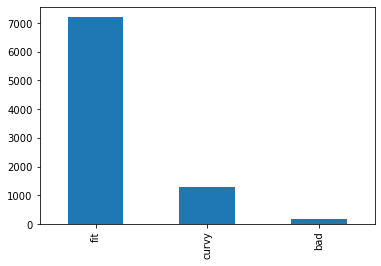

In [19]:
df.body_type.value_counts().plot.bar()

In [20]:
status={"mostly":"","strictly":""}      #Map islemi
df["diet"].replace(status,regex=True,inplace=True)
df["diet"]=df["diet"].str.strip() # kelime sonundaki ve baştaki boşlukları temziliyoruz   (" merhaba dünya   ")


<AxesSubplot:>

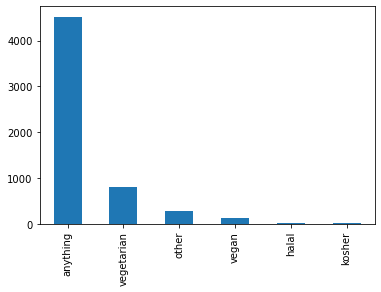

In [23]:
df["diet"].value_counts().plot.bar()
# parantezli yada parantessiz ayni sonucu veriyor.

In [25]:
df["education"].replace({"working on":"student","graduated from":"graduated","dropped out":"dropped"},regex=True)
df["education"]=df["education"].str.split().str[0]
df["education"].replace({"college/university":"student","two-year":"student","masters":"student","working":"student","space":"student","ph.d":"graduated","law":"graduated","high":"graduated"},regex=True,inplace=True)


<AxesSubplot:>

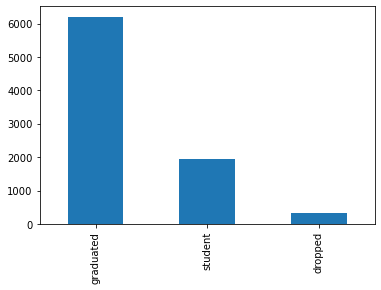

In [26]:
df.education.value_counts().plot.bar()

In [27]:
df.head()

,age,body_type,diet,drinks,drugs,education,ethnicity,height,income,job,last_online,location,offspring,orientation,pets,religion,sex,sign,smokes,speaks,status
0,22.0,curvy,anything,socially,never,student,"asian, white",75.0,-1.0,transportation,2012-06-28-20-30,"south san francisco, california","doesn&rsquo;t have kids, but might want them",straight,likes dogs and likes cats,agnosticism and very serious about it,m,gemini,sometimes,english,single
1,35.0,fit,other,often,sometimes,student,white,70.0,80000.0,hospitality / travel,2012-06-29-21-41,"oakland, california","doesn&rsquo;t have kids, but might want them",straight,likes dogs and likes cats,agnosticism but not too serious about it,m,cancer,no,"english (fluently), spanish (poorly), french (...",single
2,38.0,fit,anything,socially,NaN,graduated,NaN,68.0,-1.0,NaN,2012-06-27-09-10,"san francisco, california",NaN,straight,has cats,NaN,m,pisces but it doesn&rsquo;t matter,no,"english, french, c++",available
3,23.0,fit,vegetarian,socially,NaN,student,white,71.0,20000.0,student,2012-06-28-14-22,"berkeley, california",doesn&rsquo;t want kids,straight,likes cats,NaN,m,pisces,no,"english, german (poorly)",single
4,29.0,fit,NaN,socially,never,graduated,"asian, black, other",66.0,-1.0,artistic / musical / writer,2012-06-27-21-26,"san francisco, california",NaN,straight,likes dogs and likes cats,NaN,m,aquarius,no,english,single


In [28]:
df.drop(["ethnicity","job"],axis=1,inplace=True)

In [29]:
df.head()

,age,body_type,diet,drinks,drugs,education,height,income,last_online,location,offspring,orientation,pets,religion,sex,sign,smokes,speaks,status
0,22.0,curvy,anything,socially,never,student,75.0,-1.0,2012-06-28-20-30,"south san francisco, california","doesn&rsquo;t have kids, but might want them",straight,likes dogs and likes cats,agnosticism and very serious about it,m,gemini,sometimes,english,single
1,35.0,fit,other,often,sometimes,student,70.0,80000.0,2012-06-29-21-41,"oakland, california","doesn&rsquo;t have kids, but might want them",straight,likes dogs and likes cats,agnosticism but not too serious about it,m,cancer,no,"english (fluently), spanish (poorly), french (...",single
2,38.0,fit,anything,socially,NaN,graduated,68.0,-1.0,2012-06-27-09-10,"san francisco, california",NaN,straight,has cats,NaN,m,pisces but it doesn&rsquo;t matter,no,"english, french, c++",available
3,23.0,fit,vegetarian,socially,NaN,student,71.0,20000.0,2012-06-28-14-22,"berkeley, california",doesn&rsquo;t want kids,straight,likes cats,NaN,m,pisces,no,"english, german (poorly)",single
4,29.0,fit,NaN,socially,never,graduated,66.0,-1.0,2012-06-27-21-26,"san francisco, california",NaN,straight,likes dogs and likes cats,NaN,m,aquarius,no,english,single


<AxesSubplot:xlabel='last_online_year', ylabel='count'>

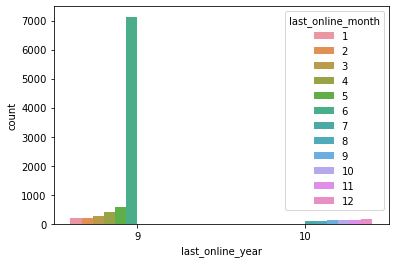

In [30]:
df["last_online_year"]=2021-(df['last_online'].str[:4]).astype(int)
df["last_online_month"]=(df['last_online'].str[5:7]).astype(int)
df.drop('last_online',axis=1)
sns.countplot("last_online_year",hue="last_online_month",data=df)

In [32]:
df.isnull().sum()

age                     0
body_type             848
diet                 3753
drinks                502
drugs                2299
education            1055
height                  0
income                  0
last_online             0
location                0
offspring            5628
orientation             0
pets                 3162
religion             3253
sex                     0
sign                 1738
smokes                918
speaks                  6
status                  0
last_online_year        0
last_online_month       0
dtype: int64

In [35]:
df.location=df.location.str.split(",").str[0]     #virgulleri kaldirmak icin kullandik


In [36]:
df.location

0       south san francisco
1                   oakland
2             san francisco
3                  berkeley
4             san francisco
               ...         
9509          san francisco
9510          san francisco
9511          san francisco
9512          san francisco
9513          castro valley
Name: location, Length: 9514, dtype: object

<AxesSubplot:>

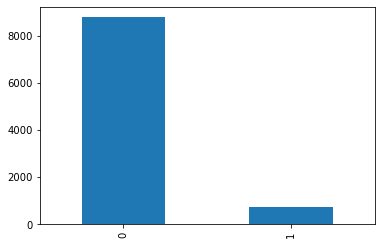

In [37]:
offsprings=[]
for i in df.offspring.fillna("bilinmiyor").str.replace("[^\w\s]",""):   #offspring'i bilinmiyorla doldurduk ve parantezdeki yazilari sildik.
    if "doesnrsquot" in i:
        offsprings.append("0")
    elif "bilinmiyor" in i:
        offsprings.append("0")
    else:
        offsprings.append("1")
        
df["offspring"]=offsprings
df["offspring"]=df["offspring"].astype(int)
df["offspring"].value_counts().plot.bar()

In [38]:
df.sample()

,age,body_type,diet,drinks,drugs,education,height,income,last_online,location,offspring,orientation,pets,religion,sex,sign,smokes,speaks,status,last_online_year,last_online_month
2849,56.0,fit,anything,socially,never,graduated,65.0,-1.0,2012-02-28-22-52,half moon bay,1,straight,NaN,agnosticism,f,scorpio,no,english,single,9,2


<AxesSubplot:>

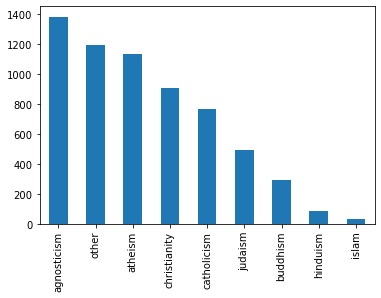

In [39]:
df["religion"]=df["religion"].str.split().str[0]
df["religion"].value_counts().plot.bar()

<AxesSubplot:>

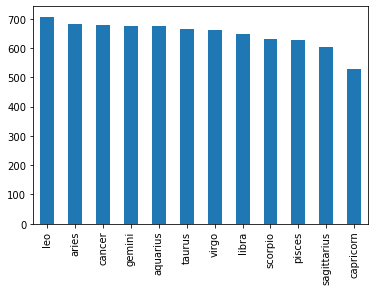

In [40]:
df["sign"]=df["sign"].str.split().str[0]
df["sign"].value_counts().plot.bar()

In [43]:
df.sample(10)

,age,body_type,diet,drinks,drugs,education,height,income,last_online,location,offspring,orientation,pets,religion,sex,sign,smokes,speaks,status,last_online_year,last_online_month
6862,23.0,fit,anything,socially,never,student,71.0,-1.0,2012-06-28-22-24,mill valley,0,straight,likes dogs and likes cats,NaN,f,cancer,no,"english (fluently), spanish (okay)",single,9,6
4238,49.0,fit,anything,socially,sometimes,graduated,73.0,50000.0,2012-06-27-21-42,oakland,0,gay,likes dogs and has cats,agnosticism,m,NaN,no,"english, french",single,9,6
575,61.0,fit,anything,socially,never,graduated,68.0,-1.0,2012-06-28-16-37,moraga,1,straight,likes dogs and dislikes cats,catholicism,m,gemini,no,english (fluently),single,9,6
8579,36.0,curvy,anything,socially,never,graduated,73.0,-1.0,2012-06-29-14-03,redwood city,0,straight,likes dogs,atheism,m,libra,no,english,single,9,6
1738,26.0,fit,other,socially,sometimes,graduated,74.0,-1.0,2012-06-26-00-24,berkeley,0,straight,likes dogs and likes cats,atheism,m,taurus,no,"english, spanish (poorly)",single,9,6
2866,31.0,curvy,NaN,NaN,never,graduated,67.0,80000.0,2012-06-06-23-37,san francisco,0,straight,NaN,agnosticism,f,NaN,NaN,"english, french, russian",single,9,6
3991,47.0,fit,anything,socially,never,graduated,69.0,150000.0,2012-06-29-21-43,fairfax,1,straight,has cats,NaN,m,sagittarius,no,"english, german (okay)",single,9,6
8618,27.0,NaN,NaN,socially,never,NaN,68.0,-1.0,2012-06-29-09-51,san francisco,0,straight,NaN,NaN,m,NaN,no,english,single,9,6
329,45.0,fit,NaN,rarely,never,graduated,66.0,100000.0,2012-06-29-21-41,san francisco,1,straight,NaN,other,m,virgo,no,english (fluently),single,9,6
7781,39.0,fit,anything,socially,never,graduated,65.0,-1.0,2012-06-29-17-01,pleasant hill,0,straight,NaN,christianity,f,capricorn,no,english,single,9,6


In [44]:
df["number_of_fluent_languages"]=df.speaks.str.count("fluently")
df["number_of_fluent_languages"].replace(0,1,regex=True,inplace=True)
df["number_of_poorly_languages"]=df.speaks.str.count("poorly")
df.drop("speaks",axis=1,inplace=True)

<AxesSubplot:xlabel='number_of_fluent_languages', ylabel='count'>

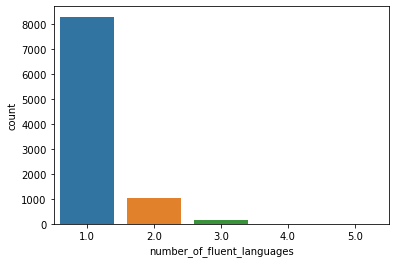

In [45]:
sns.countplot(df["number_of_fluent_languages"])

<AxesSubplot:xlabel='number_of_poorly_languages', ylabel='count'>

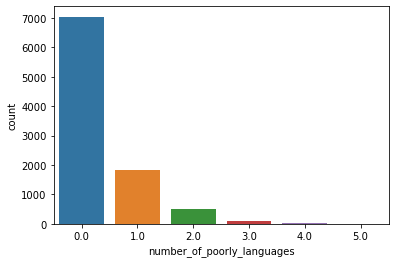

In [47]:
sns.countplot(df['number_of_poorly_languages'])

In [48]:
for column in df.select_dtypes(include=np.number):
    df[column].fillna(df[column].median(),inplace=True)

In [49]:
for column in df.select_dtypes(include=np.object):
    df[column].fillna(df[column].mode()[0],inplace=True)

In [50]:
df.isnull().sum()

age                           0
body_type                     0
diet                          0
drinks                        0
drugs                         0
education                     0
height                        0
income                        0
last_online                   0
location                      0
offspring                     0
orientation                   0
pets                          0
religion                      0
sex                           0
sign                          0
smokes                        0
status                        0
last_online_year              0
last_online_month             0
number_of_fluent_languages    0
number_of_poorly_languages    0
dtype: int64

In [52]:
epoch=[]
for i in df["age"].values:
    if (i>=18) and (i<=32):
        epoch.append("Millennial")
    elif (i>=33) and (i<=47):
        epoch.append("Gen X-er")
    elif (48>=33) and (i<=70):
        epoch.append("Boomers")
    else:
        epoch.append("Unkown")

df["epoch"]=epoch

In [51]:
df["age"].values

array([22., 35., 38., ..., 34., 29., 49.])

In [53]:
df.epoch

0       Millennial
1         Gen X-er
2         Gen X-er
3       Millennial
4       Millennial
           ...    
9509    Millennial
9510    Millennial
9511      Gen X-er
9512    Millennial
9513       Boomers
Name: epoch, Length: 9514, dtype: object

In [54]:
df.head()

,age,body_type,diet,drinks,drugs,education,height,income,last_online,location,offspring,orientation,pets,religion,sex,sign,smokes,status,last_online_year,last_online_month,number_of_fluent_languages,number_of_poorly_languages,epoch
0,22.0,curvy,anything,socially,never,student,75.0,-1.0,2012-06-28-20-30,south san francisco,0,straight,likes dogs and likes cats,agnosticism,m,gemini,sometimes,single,9,6,1.0,0.0,Millennial
1,35.0,fit,other,often,sometimes,student,70.0,80000.0,2012-06-29-21-41,oakland,0,straight,likes dogs and likes cats,agnosticism,m,cancer,no,single,9,6,1.0,2.0,Gen X-er
2,38.0,fit,anything,socially,never,graduated,68.0,-1.0,2012-06-27-09-10,san francisco,0,straight,has cats,agnosticism,m,pisces,no,available,9,6,1.0,0.0,Gen X-er
3,23.0,fit,vegetarian,socially,never,student,71.0,20000.0,2012-06-28-14-22,berkeley,0,straight,likes cats,agnosticism,m,pisces,no,single,9,6,1.0,1.0,Millennial
4,29.0,fit,anything,socially,never,graduated,66.0,-1.0,2012-06-27-21-26,san francisco,0,straight,likes dogs and likes cats,agnosticism,m,aquarius,no,single,9,6,1.0,0.0,Millennial


In [55]:
df.describe()

,age,height,income,offspring,last_online_year,last_online_month,number_of_fluent_languages,number_of_poorly_languages
count,9514.000000,9514.000000,9514.000000,9514.000000,9514.000000,9514.000000,9514.000000,9514.000000
mean,32.084192,68.337398,18887.145155,0.076624,9.077255,5.864936,1.146941,0.338974
std,9.445488,3.905229,91428.807808,0.266008,0.267009,1.627365,0.413248,0.645990
min,18.000000,36.000000,-1.000000,0.000000,9.000000,1.000000,1.000000,0.000000
25%,25.000000,66.000000,-1.000000,0.000000,9.000000,6.000000,1.000000,0.000000
50%,30.000000,68.000000,-1.000000,0.000000,9.000000,6.000000,1.000000,0.000000
75%,36.000000,71.000000,-1.000000,0.000000,9.000000,6.000000,1.000000,1.000000
max,110.000000,95.000000,1000000.000000,1.000000,10.000000,12.000000,5.000000,5.000000


In [56]:
df.corr()

,age,height,income,offspring,last_online_year,last_online_month,number_of_fluent_languages,number_of_poorly_languages
age,1.000000,-0.022078,0.011424,0.341753,-0.015792,-0.003527,-0.024795,-0.001559
height,-0.022078,1.000000,0.073105,-0.033389,-0.016633,-0.010858,0.015458,0.036414
income,0.011424,0.073105,1.000000,0.015045,0.009376,0.002043,0.039186,0.028577
offspring,0.341753,-0.033389,0.015045,1.000000,0.029129,0.005697,0.000841,-0.012303
last_online_year,-0.015792,-0.016633,0.009376,0.029129,1.000000,0.685183,-0.003813,-0.034827
last_online_month,-0.003527,-0.010858,0.002043,0.005697,0.685183,1.000000,-0.006593,-0.006141
number_of_fluent_languages,-0.024795,0.015458,0.039186,0.000841,-0.003813,-0.006593,1.000000,0.067774
number_of_poorly_languages,-0.001559,0.036414,0.028577,-0.012303,-0.034827,-0.006141,0.067774,1.000000


<AxesSubplot:>

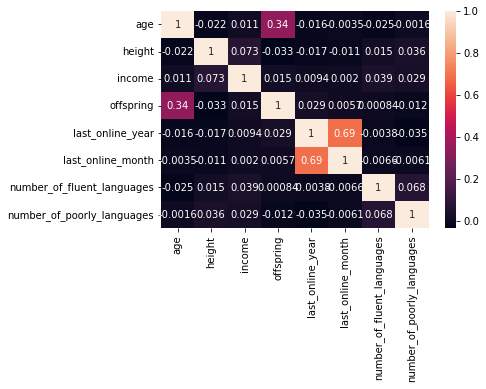

In [57]:
sns.heatmap(df.corr(),annot=True)

In [58]:
df_reg=pd.get_dummies(df,drop_first=True)

In [59]:
df_reg

,age,height,income,offspring,last_online_year,last_online_month,number_of_fluent_languages,number_of_poorly_languages,body_type_curvy,body_type_fit,diet_halal,diet_kosher,diet_other,diet_vegan,diet_vegetarian,drinks_not at all,drinks_often,drinks_rarely,drinks_socially,drinks_very often,drugs_often,drugs_sometimes,education_graduated,education_student,last_online_2011-06-27-22-05,last_online_2011-06-28-14-10,last_online_2011-06-29-20-30,last_online_2011-06-29-20-34,last_online_2011-06-29-20-38,last_online_2011-06-30-04-52,last_online_2011-06-30-20-03,last_online_2011-06-30-23-38,last_online_2011-07-01-05-33,last_online_2011-07-01-07-34,last_online_2011-07-01-20-46,last_online_2011-07-01-21-21,last_online_2011-07-02-19-40,last_online_2011-07-02-23-17,last_online_2011-07-03-15-25,last_online_2011-07-03-16-23,last_online_2011-07-04-10-18,last_online_2011-07-04-14-06,last_online_2011-07-05-07-21,last_online_2011-07-05-08-39,last_online_2011-07-05-20-26,last_online_2011-07-06-08-47,last_online_2011-07-06-23-19,last_online_2011-07-06-23-49,last_online_2011-07-07-00-15,last_online_2011-07-07-09-07,...,location_westlake,location_woodacre,location_woodbridge,location_woodside,orientation_gay,orientation_straight,pets_dislikes dogs,pets_dislikes dogs and dislikes cats,pets_dislikes dogs and has cats,pets_dislikes dogs and likes cats,pets_has cats,pets_has dogs,pets_has dogs and dislikes cats,pets_has dogs and has cats,pets_has dogs and likes cats,pets_likes cats,pets_likes dogs,pets_likes dogs and dislikes cats,pets_likes dogs and has cats,pets_likes dogs and likes cats,religion_atheism,religion_buddhism,religion_catholicism,religion_christianity,religion_hinduism,religion_islam,religion_judaism,religion_other,sex_m,sign_aries,sign_cancer,sign_capricorn,sign_gemini,sign_leo,sign_libra,sign_pisces,sign_sagittarius,sign_scorpio,sign_taurus,sign_virgo,smokes_sometimes,smokes_trying to quit,smokes_when drinking,smokes_yes,status_married,status_seeing someone,status_single,epoch_Gen X-er,epoch_Millennial,epoch_Unkown
0,22.0,75.0,-1.0,0,9,6,1.0,0.0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0
1,35.0,70.0,80000.0,0,9,6,1.0,2.0,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0
2,38.0,68.0,-1.0,0,9,6,1.0,0.0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,23.0,71.0,20000.0,0,9,6,1.0,1.0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0
4,29.0,66.0,-1.0,0,9,6,1.0,0.0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9509,28.0,73.0,60000.0,0,9,6,1.0,0.0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0
9510,31.0,72.0,-1.0,0,9,4,1.0,0.0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,1,0
9511,3

In [60]:
x,y=df_reg.drop("age",axis=1),df[["age"]]

In [62]:
def regression_funct(x,y):
    from sklearn.linear_model import LinearRegression
    from sklearn.linear_model import Ridge,Lasso
    from sklearn.linear_model import ElasticNet
    from sklearn.tree import ExtraTreeRegressor
    from sklearn.ensemble import GradientBoostingRegressor
    from sklearn.neighbors import KNeighborsRegressor
    
    from sklearn.model_selection import train_test_split

    from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error
    
    
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

    L=LinearRegression()
    R=Ridge()
    Lass=Lasso()
    E=ElasticNet()
    ExTree=ExtraTreeRegressor()
    GBR=GradientBoostingRegressor()
    KN=KNeighborsRegressor()
    
    algos=[L,R,Lass,E,ExTree,GBR,KN]
    algo_names=['LinearRegression','Ridge','Lasso','ElasticNet','ExtraTreeRegressor','GradientBoostingRegressor','KNeighborsRegressor']
    r_squared=[]
    rmse=[]
    mae=[]
    
    result=pd.DataFrame(columns=['R_Squared','RMSE','MAE'],index=algo_names)
    
    for item in algos:
        item.fit(x_train,y_train)
        item.predict(x_test)
        r_squared.append(r2_score(y_test,item.predict(x_test)))
        rmse.append((mean_squared_error(y_test,item.predict(x_test)))**.5)
        mae.append(mean_absolute_error(y_test,item.predict(x_test)))
        
    result.R_Squared=r_squared
    result.RMSE=rmse
    result.MAE=mae
        
    return result.sort_values('R_Squared',ascending=False)

In [65]:
regression_funct(x,y)

,R_Squared,RMSE,MAE
GradientBoostingRegressor,0.853299,3.651430,2.973868
Ridge,0.837575,3.842130,3.091545
LinearRegression,0.804198,4.218471,3.354607
ExtraTreeRegressor,0.730593,4.948234,3.843931
Lasso,0.572190,6.235505,4.213471
KNeighborsRegressor,0.446543,7.092315,4.722964
ElasticNet,0.308607,7.926994,5.422564
